In [1]:
import tensorflow.keras as keras
import pandas as pd

In [2]:
##load and prepare data##
#load data from CSV files located in /data/asl_data/
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

#separate out target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

#separate out image vectors 
x_train = train_df.values
x_valid = valid_df.values

#turn our scalar targets into binary, using 24 classes
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

#normalize image data
x_train = x_train / 255
x_valid = x_valid / 255

In [5]:
##Reshape data for Convolutional Neural Network##
#reshape from 784 single vector to (3D 28,28,1) with a single color channel
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [49]:
##Create layers for Convolutional model##
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
#Convolutional layer, filter/kernel=75, window of 3x3, input shape is image of 28,28 with color channel of 1
model.add(Conv2D(75, (3,3), strides=1, padding="same", activation="relu", input_shape=(28,28,1)))
model.add(BatchNormalization())
#MaxPool Highlight most present feature in patch
model.add(MaxPool2D((2,2), strides=2, padding="same"))
model.add(Conv2D(50, (3,3), strides=1, padding="same", activation="relu"))
#Dropout to prevent overfitting
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))
model.add(Conv2D(25, (3,3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))
#Flatten to reduce 3D structure to a single dimension appropriate to run through Dense Layers
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [18]:
#Getting Model summary and seeing parameter count
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)         

In [20]:
##Compile Model using Categorical Crossentropy loss function and using accuracy as a metric##
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
##Train Model##
model.fit(x_train, y_train, epochs=20, verbose = 1, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 [==============================] - 42s 48ms/step - loss: 0.8257 - accuracy: 0.7594 - val_loss: 0.4743 - val_accuracy: 0.8516
Epoch 2/20
858/858 [==============================] - 44s 51ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.3865 - val_accuracy: 0.9090
Epoch 3/20
858/858 [==============================] - 43s 50ms/step - loss: 0.0093 - accuracy: 0.9966 - val_loss: 0.3437 - val_accuracy: 0.9191
Epoch 4/20
858/858 [==============================] - 43s 50ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.2232 - val_accuracy: 0.9504
Epoch 5/20
858/858 [==============================] - 43s 50ms/step - loss: 0.0035 - accuracy: 0.9986 - val_loss: 0.2826 - val_accuracy: 0.9452
Epoch 6/20
858/858 [==============================] - 44s 51ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.2079 - val_accuracy: 0.9594
Epoch 7/20
858/858 [==============================] - 45s 53ms/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 0.2155 - val_accuracy:

In [28]:
#Visualization of predictions
import tensorflow as tf
import matplotlib.pyplot as plt #Visualize sample
import numpy as np #ARGMAX : Argmax is most commonly used in machine learning for finding the class with the largest predicted probability

model.save('test.model')
new_model = tf.keras.models.load_model('test.model')
predictions = new_model.predict([x_valid])


INFO:tensorflow:Assets written to: test.model\assets


In [40]:
#Create Dictionary to Map Category to Letter
numtoletter = {
  0: "A",
  1: "B",
  2: "C",
  3: "D",
  4: "E",
  5: "F",
  6: "G",
  7: "H",
  8: "I",
  9: "K",
  10: "L",
  11: "M",
  12: "N",
  13: "O",
  14: "P",
  15: "Q",
  16: "R",
  17: "S",
  18: "T",
  19: "U",
  20: "V",
  21: "W",
  22: "X",
  23: "Y",  
}

this sign represents a letter O


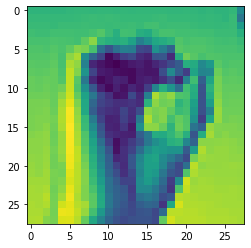

In [48]:
#to visualize training results place a number for p within the range 0 - 7000
p = 7
print("this sign represents a letter", numtoletter[np.argmax(predictions[p])] )
plt.imshow(x_valid[p])
plt.show()